#  1.

## Использованные методы OpenMP

1. **`#pragma omp parallel for`**:
   - Используется для распараллеливания цикла.
   - Применяется во всех параллельных методах (`no_reduction_method` и `reduction_method`).

2. **`#pragma omp critical`**:
   - Используется в методе `no_reduction_method` для синхронизации доступа к разделяемым переменным `max_val` и `min_val`.
   - Обеспечивает безопасность данных, но может вызывать значительные затраты времени из-за блокировок.

3. **`#pragma omp parallel for reduction`**:
   - Используется в методе `reduction_method` для эффективной параллельной агрегации значений.
   - Уменьшает накладные расходы синхронизации по сравнению с использованием `critical`.

---

## Анализ результатов

Результаты времени выполнения (в миллисекундах) для различных размеров векторов:

| Размер вектора | Последовательный метод | Без редукции | С редукцией |
|----------------|-------------------------|--------------|-------------|
| 1,000          | 0.00806                | 4.47948      | 0.11162     |
| 10,000         | 0.07228                | 0.44706      | 0.07514     |
| 100,000        | 0.53118                | 2.08786      | 0.19390     |
| 1,000,000      | 5.53804                | 23.2917      | 1.36948     |
| 10,000,000     | 60.8474                | 266.221      | 8.27470     |

### Выводы:
1. **Последовательный метод**:
   - Время выполнения линейно растет с увеличением размера данных.
   - Самый простой, но медленный способ обработки больших данных.

2. **Метод без редукции (`no_reduction_method`)**:
   - Значительно медленнее из-за высокой накладной стоимости `critical`.
   - При больших размерах векторов (10,000,000) время выполнения увеличивается экспоненциально.

3. **Метод с редукцией (`reduction_method`)**:
   - Самый эффективный из параллельных методов.
   - Обеспечивает ускорение по сравнению с последовательным методом благодаря уменьшению накладных расходов синхронизации.


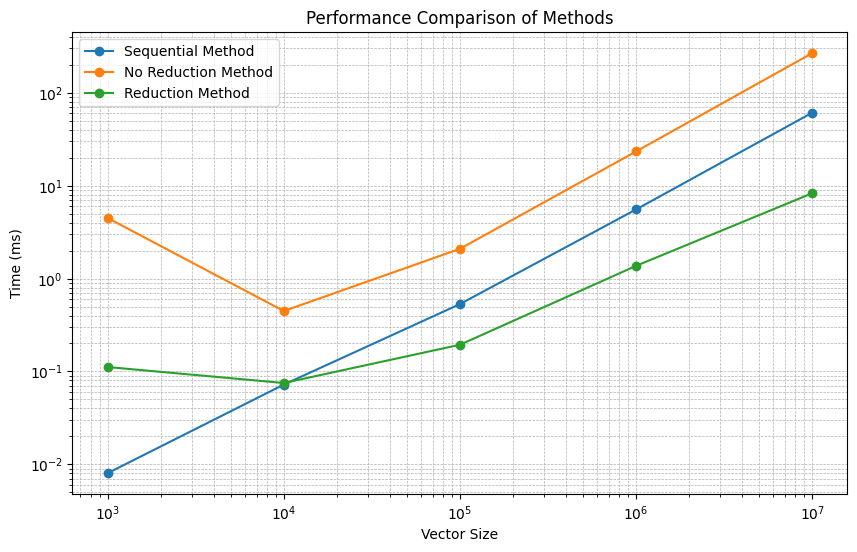

In [1]:
import matplotlib.pyplot as plt

# Data
vector_sizes = [1000, 10000, 100000, 1000000, 10000000]
sequential_times = [0.00806, 0.07228, 0.53118, 5.53804, 60.8474]
no_reduction_times = [4.47948, 0.44706, 2.08786, 23.2917, 266.221]
reduction_times = [0.11162, 0.07514, 0.1939, 1.36948, 8.2747]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(vector_sizes, sequential_times, label="Sequential Method", marker='o')
plt.plot(vector_sizes, no_reduction_times, label="No Reduction Method", marker='o')
plt.plot(vector_sizes, reduction_times, label="Reduction Method", marker='o')

# Log scale for better visualization
plt.xscale('log')
plt.yscale('log')

# Labels and legend
plt.xlabel("Vector Size")
plt.ylabel("Time (ms)")
plt.title("Performance Comparison of Methods")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# 2.

## Использованные методы OpenMP

1. **`#pragma omp parallel for reduction(+:dot_product)`**:
   - Используется для параллельного вычисления скалярного произведения с редукцией.
   - Редукция суммирует результаты вычислений отдельных потоков, минимизируя накладные расходы синхронизации.

---

## Анализ результатов

### Время выполнения (в миллисекундах) для различных размеров векторов

| Размер вектора | Последовательный метод | Параллельный метод с редукцией |
|----------------|-------------------------|--------------------------------|
| 1,000          | 0.00812                | 5.41364                       |
| 10,000         | 0.05956                | 0.1195                        |
| 100,000        | 0.41344                | 0.198                         |
| 1,000,000      | 4.2213                 | 1.1604                        |
| 10,000,000     | 49.3806                | 16.429                        |
| 100,000,000    | 493.506                | 86.0562                       |

---

### Выводы
1. **Последовательный метод**:
   - Линейно увеличивает время выполнения с ростом размера векторов.
   - Простой в реализации, но ограничен в производительности.

2. **Метод с редукцией**:
   - При небольших размерах векторов (например, 1,000 элементов) медленнее из-за накладных расходов на управление потоками.
   - При увеличении размера данных демонстрирует значительное ускорение. Например, при размере вектора 100,000,000 достигается ускорение более чем в 5 раз по сравнению с последовательным методом.

3. **Маленькие данные**:
   - Использование параллельного подхода нецелесообразно для небольших объемов данных из-за накладных расходов.

---

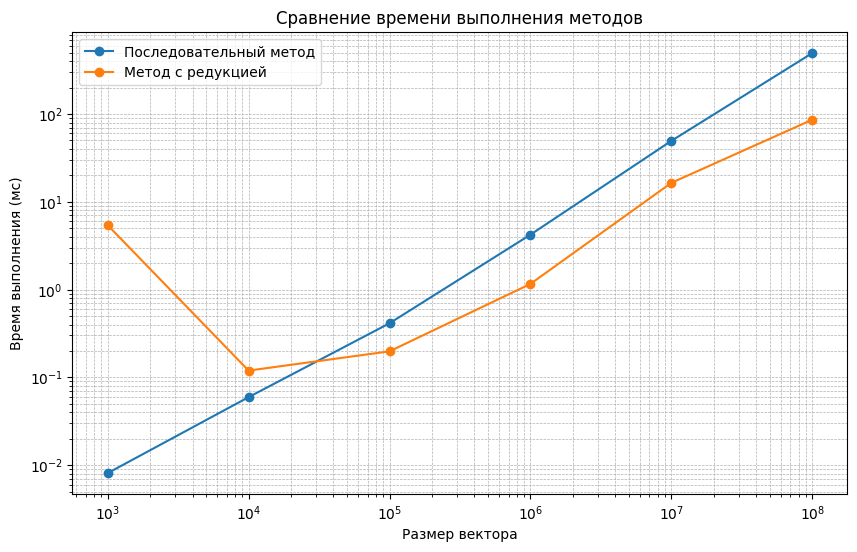

In [2]:
import matplotlib.pyplot as plt

# Данные
vector_sizes = [1000, 10000, 100000, 1000000, 10000000, 100000000]
sequential_times = [0.00812, 0.05956, 0.41344, 4.2213, 49.3806, 493.506]
reduction_times = [5.41364, 0.1195, 0.198, 1.1604, 16.429, 86.0562]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(vector_sizes, sequential_times, label="Последовательный метод", marker='o')
plt.plot(vector_sizes, reduction_times, label="Метод с редукцией", marker='o')

# Настройки графика
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Размер вектора")
plt.ylabel("Время выполнения (мс)")
plt.title("Сравнение времени выполнения методов")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# 3.

## Использованные методы OpenMP

1. **`#pragma omp parallel for reduction(+:integral)`**:
   - Используется для параллельного вычисления интеграла методом прямоугольников.
   - Редукция позволяет безопасно суммировать результаты вычислений отдельных потоков в одну общую переменную `integral`.

---

## Результаты выполнения

### Таблица времени выполнения (в миллисекундах)

| Пределы интегрирования | Последовательный метод | Параллельный метод |
|-------------------------|------------------------|--------------------|
| [0, 1]                 | 3.76888               | 5.18094           |
| [0, 10]                | 3.68822               | 1.15508           |
| [0, 100]               | 3.82616               | 1.02912           |
| [0, 1000]              | 3.65788               | 1.06856           |
| [0, 10000]             | 3.67974               | 1.05662           |

---

### Выводы

1. **Последовательный метод**:
   - Время выполнения стабильно (~3.7 мс), независимо от пределов интегрирования, так как количество разбиений (`n = 1,000,000`) остается постоянным.

2. **Параллельный метод**:
   - При небольших пределах интегрирования ([0, 1]) параллельный метод медленнее из-за накладных расходов на создание и синхронизацию потоков.
   - При увеличении пределов интегрирования параллельный метод демонстрирует значительное ускорение (примерно в 3-4 раза быстрее последовательного).

3. **Маленькие пределы интегрирования**:
   - Использование параллельного метода нецелесообразно для небольших интервалов из-за высокой стоимости управления потоками.


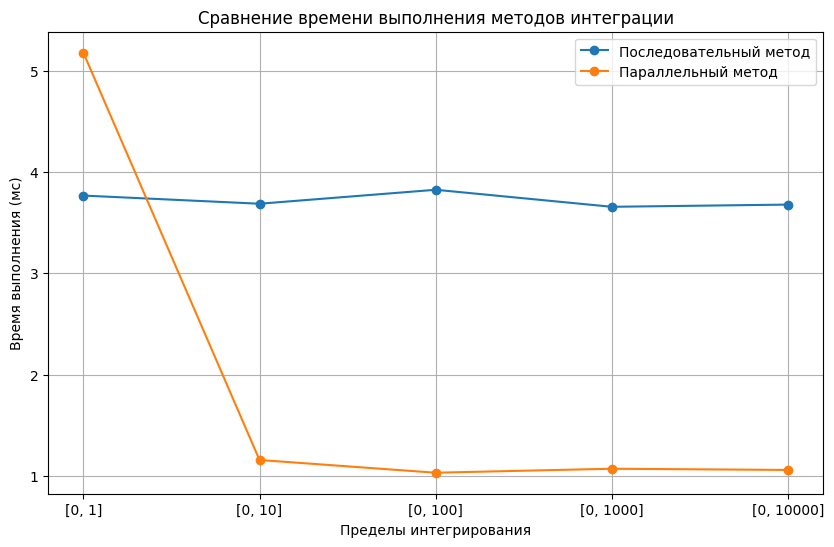

In [3]:
import matplotlib.pyplot as plt

# Данные
integration_limits = ["[0, 1]", "[0, 10]", "[0, 100]", "[0, 1000]", "[0, 10000]"]
sequential_times = [3.76888, 3.68822, 3.82616, 3.65788, 3.67974]
parallel_times = [5.18094, 1.15508, 1.02912, 1.06856, 1.05662]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(integration_limits, sequential_times, label="Последовательный метод", marker='o')
plt.plot(integration_limits, parallel_times, label="Параллельный метод", marker='o')

# Настройки графика
plt.xlabel("Пределы интегрирования")
plt.ylabel("Время выполнения (мс)")
plt.title("Сравнение времени выполнения методов интеграции")
plt.legend()
plt.grid(True)
plt.show()